# Project 3: Predictive modeling
*University of Ljubljana, Faculty for computer and information science* <br />
*Course: Introduction to data science*

In this Jupyter notebook you should document all the analyses (tables, figures, models) you have perfomed to write your report.

All the code in the notebook must be reproducible and runnable, so include instructions for the environment setup or other specifics needed to run the notebook.

## Environment setup

Write instructions how to setup the environment to run this notebook, which libraries are installed, etc. Also provide installation sources.

`ENVIRONMENT SETUP:

- conda create --name project_3

- conda install python=3.7

- conda install jupyter notebook

- ipython kernel install --name project_3 --user

- conda install pandas

- conda install numpy

- conda install matplotlib

- conda install scipy

- conda install seaborn

- conda install scikit-learn`

In [1]:
# Load all the libraries needed for running the code chunks below
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import svm
from matplotlib.pyplot import figure
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB





os. getcwd() #get current work dir

'C:\\Users\\zaloz\\Desktop\\exFMF\\upd\\project-3-databox-ZaloznikV'

# Modeling

Your main task is to provide insights into the data to the reader through text, tables, models and visualizations. Aim for a concise, efficient, and effective solution.

In [2]:
signups = pd.read_csv("Data\signups\SignupsAttributes.csv")
events = pd.read_csv("Data\events\AllEvents.csv", error_bad_lines=False) #automatically ignoring headers in all_events csv file
#print(signups.head())
#events.head()

C:\Users\zaloz\anaconda3\envs\project_3\lib\site-packages\IPython\core\interactiveshell.py:3444: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
b'Skipping line 7878587: expected 4 fields, saw 7\nSkipping line 7888587: expected 4 fields, saw 9\nSkipping line 7898587: expected 4 fields, saw 7\nSkipping line 7918587: expected 4 fields, saw 7\nSkipping line 7928587: expected 4 fields, saw 7\nSkipping line 7938587: expected 4 fields, saw 7\n'


In [3]:
signups.describe(include="all")


,$distinct_id,$properties.space_id,$properties.country,$properties.is_agency,$properties.company_created,$properties.became_paying,$properties.became_pql,$properties.cancelled,$properties.had_trial,$properties.trial_features,...,$properties.level_achieved,$properties.has_mobile_company,$properties.sessions_company,$properties.databoards_company,$properties.cloud_sources_company,$properties.metrics_company,$properties.users_in_space,$properties.scheduled_snapshots_company,$properties.custom_queries_company,$properties.scripts_company
count,101698.000000,101698.000000,101698,101698,101698,101698,101698,101698,101698,101137,...,101698,101698,101698.000000,101698.000000,101698.000000,101698.000000,101698.000000,101698.000000,101698.000000,101698.000000
unique,NaN,NaN,307,2,94805,2816,9994,1155,2,259,...,5,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,United States,False,2020-12-03T12:51:00,undefined,undefined,undefined,False,undefined,...,0,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,25502,86645,19,98748,91187,100542,83678,83795,...,44611,93584,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,209132.380568,209132.380568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,15.676316,1.094535,1.172294,3.985113,1.131291,0.044131,0.846437,0.363173
std,39480.787415,39480.787415,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,88.293682,3.083744,2.708625,9.701362,0.755802,0.383822,12.146176,5.919391
min,142846.000000,142846.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,174966.250000,174966.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,207723.500000,207723.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,242016.750000,242016.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,4.000000,1.000000,1.000000,4.000000,1.000000,0.000000,0.000000,0.000000


In [4]:
signups.head()

,$distinct_id,$properties.space_id,$properties.country,$properties.is_agency,$properties.company_created,$properties.became_paying,$properties.became_pql,$properties.cancelled,$properties.had_trial,$properties.trial_features,...,$properties.level_achieved,$properties.has_mobile_company,$properties.sessions_company,$properties.databoards_company,$properties.cloud_sources_company,$properties.metrics_company,$properties.users_in_space,$properties.scheduled_snapshots_company,$properties.custom_queries_company,$properties.scripts_company
0,142868,142868,South Africa,True,2019-11-29T11:30:00,undefined,undefined,undefined,False,undefined,...,undefined,False,1,0,1,9,1,0,0,0
1,143012,143012,Canada,False,2019-11-30T22:14:00,undefined,undefined,undefined,False,undefined,...,0,False,7,1,3,37,1,0,0,0
2,143074,143074,Spain,False,2019-12-01T17:24:00,2020-02-09T22:49:00,2019-12-02T18:05:00,undefined,True,More Data Sources; More Databoards,...,3,True,979,10,10,7,4,19,0,0
3,143438,143438,France,False,2019-12-03T14:02:00,undefined,undefined,undefined,False,undefined,...,undefined,False,2,0,0,0,1,0,0,0
4,144226,144226,Italy,False,2019-12-07T19:03:00,undefined,undefined,undefined,False,undefined,...,0,False,1,1,1,13,1,0,0,0


### Data cleaning

In [5]:
"""JOINING BOTH TABLES TOGATHER"""

unique_attributes = list(pd.unique(events["Event"])) #all parameters
unique_attributes
Dict = {}
for name in unique_attributes:
    print("Working on: ", name )
    foo = events[events["Event"] == name]
    foo = foo[["Space", "Event_count"]]
    foo = foo[foo["Space"] != "undefined"]
    Dict[name] = foo.groupby(["Space"], as_index=False).sum()
#Dict   

Working on:  _Calculation created - Total
Working on:  _Metric created - Total
Working on:  _New connection added - Total
Working on:  _New user added - Total
Working on:  _Query created - Total
Working on:  _Share new snapshot - Total
Working on:  _Share public url by copy/paste - Total
Working on:  sessions - Total


In [6]:
list(Dict.keys())

['_Calculation created - Total',
 '_Metric created - Total',
 '_New connection added - Total',
 '_New user added - Total',
 '_Query created - Total',
 '_Share new snapshot - Total',
 '_Share public url by copy/paste - Total',
 'sessions - Total']

In [7]:
data = signups
for col_name in list(Dict.keys()):
    test = Dict[col_name]
    test.rename(columns={"Event_count": col_name}, inplace=True)
    test = test.astype({"Space": int})
    data = data.merge(test, how='left', left_on='$distinct_id', right_on='Space')
    data = data.drop(['Space'], axis=1)
    
data = data.drop(['$properties.space_id'], axis=1) #dropping doubling columns



In [8]:
"""some more preprocessing"""


colnames = list(data.columns)
colnames = [s.replace("$properties.", "") for s in colnames]
colnames = [s.replace(" - Total", "") for s in colnames]

colnames = [s[1:] if s[0] in ["$", "_"] else s for s in colnames ]
colnames = [s.replace(" ", "_") for s in colnames]
data.columns = colnames

data.head()

,distinct_id,country,is_agency,company_created,became_paying,became_pql,cancelled,had_trial,trial_features,is_activated,...,custom_queries_company,scripts_company,Calculation_created,Metric_created,New_connection_added,New_user_added,Query_created,Share_new_snapshot,Share_public_url_by_copy/paste,sessions
0,142868,South Africa,True,2019-11-29T11:30:00,undefined,undefined,undefined,False,undefined,True,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,143012,Canada,False,2019-11-30T22:14:00,undefined,undefined,undefined,False,undefined,True,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,143074,Spain,False,2019-12-01T17:24:00,2020-02-09T22:49:00,2019-12-02T18:05:00,undefined,True,More Data Sources; More Databoards,True,...,0,0,NaN,5.0,19.0,5.0,NaN,29.0,52.0,904.0
3,143438,France,False,2019-12-03T14:02:00,undefined,undefined,undefined,False,undefined,False,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,144226,Italy,False,2019-12-07T19:03:00,undefined,undefined,undefined,False,undefined,True,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
"""Changing boolean columns to numerical"""
dtypes = dict(data.dtypes)
for cn in list(dtypes.keys()):
    if dtypes[cn].name == "bool":
        #print(cn)
        r = data[cn].astype(int)
        data[cn] = r
data.head()

,distinct_id,country,is_agency,company_created,became_paying,became_pql,cancelled,had_trial,trial_features,is_activated,...,custom_queries_company,scripts_company,Calculation_created,Metric_created,New_connection_added,New_user_added,Query_created,Share_new_snapshot,Share_public_url_by_copy/paste,sessions
0,142868,South Africa,1,2019-11-29T11:30:00,undefined,undefined,undefined,0,undefined,1,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,143012,Canada,0,2019-11-30T22:14:00,undefined,undefined,undefined,0,undefined,1,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,143074,Spain,0,2019-12-01T17:24:00,2020-02-09T22:49:00,2019-12-02T18:05:00,undefined,1,More Data Sources; More Databoards,1,...,0,0,NaN,5.0,19.0,5.0,NaN,29.0,52.0,904.0
3,143438,France,0,2019-12-03T14:02:00,undefined,undefined,undefined,0,undefined,0,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,144226,Italy,0,2019-12-07T19:03:00,undefined,undefined,undefined,0,undefined,1,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
data.groupby("level_achieved").count() #cleaning some undefined data in level_achieved column
data[["level_achieved"]] = data[["level_achieved"]]. replace("undefined", 0)
data["level_achieved"] = data["level_achieved"].astype(int)
data.groupby("level_achieved").count()


,distinct_id,country,is_agency,company_created,became_paying,became_pql,cancelled,had_trial,trial_features,is_activated,...,custom_queries_company,scripts_company,Calculation_created,Metric_created,New_connection_added,New_user_added,Query_created,Share_new_snapshot,Share_public_url_by_copy/paste,sessions
level_achieved,,,,,,,,,,,,,,,,,,,,,
0,87994,87994,87994,87994,87994,87994,87994,87994,87711,87994,...,87994,87994,953,1816,1025,1835,2122,1156,1202,1082
1,10934,10934,10934,10934,10934,10934,10934,10934,10765,10934,...,10934,10934,1274,4149,1467,1632,1470,1336,1394,1718
2,1947,1947,1947,1947,1947,1947,1947,1947,1872,1947,...,1947,1947,872,978,1043,1772,926,531,815,1182
3,823,823,823,823,823,823,823,823,789,823,...,823,823,499,512,612,778,507,582,449,666


In [11]:
data.dtypes

distinct_id                         int64
country                            object
is_agency                           int32
company_created                    object
became_paying                      object
became_pql                         object
cancelled                          object
had_trial                           int32
trial_features                     object
is_activated                        int32
level_achieved                      int32
has_mobile_company                  int32
sessions_company                    int64
databoards_company                  int64
cloud_sources_company               int64
metrics_company                     int64
users_in_space                      int64
scheduled_snapshots_company         int64
custom_queries_company              int64
scripts_company                     int64
Calculation_created               float64
Metric_created                    float64
New_connection_added              float64
New_user_added                    

In [12]:
data = data.fillna(0) #replace all NaN values with zero (only values in added columns)
data.head()

,distinct_id,country,is_agency,company_created,became_paying,became_pql,cancelled,had_trial,trial_features,is_activated,...,custom_queries_company,scripts_company,Calculation_created,Metric_created,New_connection_added,New_user_added,Query_created,Share_new_snapshot,Share_public_url_by_copy/paste,sessions
0,142868,South Africa,1,2019-11-29T11:30:00,undefined,undefined,undefined,0,undefined,1,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,143012,Canada,0,2019-11-30T22:14:00,undefined,undefined,undefined,0,undefined,1,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,143074,Spain,0,2019-12-01T17:24:00,2020-02-09T22:49:00,2019-12-02T18:05:00,undefined,1,More Data Sources; More Databoards,1,...,0,0,0.0,5.0,19.0,5.0,0.0,29.0,52.0,904.0
3,143438,France,0,2019-12-03T14:02:00,undefined,undefined,undefined,0,undefined,0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,144226,Italy,0,2019-12-07T19:03:00,undefined,undefined,undefined,0,undefined,1,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
data.trial_features

0                                  undefined
1                                  undefined
2         More Data Sources; More Databoards
3                                  undefined
4                                  undefined
                         ...                
101693                             undefined
101694                             undefined
101695                             undefined
101696                             undefined
101697                             undefined
Name: trial_features, Length: 101698, dtype: object

In [14]:


a = list(data.trial_features)
replace_trial_f = []
bla = []
for s in a:
    if s == 0:
        replace_trial_f.append(0)
        bla.append(0)
    elif s == "undefined":
        bla.append(0)
        replace_trial_f.append(0)
    else:
        replace_trial_f.append((s.split("; ")))
        bla.append(len(s.split("; ")))

replace_trial_f
d = [f for f in replace_trial_f if f != 0]

different_trial_features = list(set([item for sublist in d for item in sublist]))
different_trial_features

qb = [] #Query Builder
dc = [] #Data Calculations
mds = [] #More Data Sources
md = [] #More Databoards
pds = [] #Premium Data Sources

for f in replace_trial_f:
    if f == 0:
        qb.append(0)
        dc.append(0)
        mds.append(0)
        md.append(0)
        pds.append(0)
    else:
        if 'Query Builder' in f:
            qb.append(1)
        if 'Query Builder' not in f:
            qb.append(0)
        if 'Data Calculations' in f:
            dc.append(1)
        if 'Data Calculations' not in f:
            dc.append(0) 
        if 'More Data Sources' in f:
            mds.append(1)
        if 'More Data Sources' not in f:
            mds.append(0)
        if 'More Databoards' in f:
            md.append(1)
        if 'More Databoards' not in f:
            md.append(0) 
        if 'Premium Data Sources' in f:
            pds.append(1)
        if 'Premium Data Sources' not in f:
            pds.append(0) 
        

data["number_trial_features"] = bla
data['Query_Builder'] = qb
data['Data_Calculations'] = dc
data['More_Data_Sources'] = mds
data['More_Databoards'] = md
data['Premium_Data_Sources'] = pds

data = data.drop(columns=["trial_features"])
data.head()

,distinct_id,country,is_agency,company_created,became_paying,became_pql,cancelled,had_trial,is_activated,level_achieved,...,Query_created,Share_new_snapshot,Share_public_url_by_copy/paste,sessions,number_trial_features,Query_Builder,Data_Calculations,More_Data_Sources,More_Databoards,Premium_Data_Sources
0,142868,South Africa,1,2019-11-29T11:30:00,undefined,undefined,undefined,0,1,0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0
1,143012,Canada,0,2019-11-30T22:14:00,undefined,undefined,undefined,0,1,0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0
2,143074,Spain,0,2019-12-01T17:24:00,2020-02-09T22:49:00,2019-12-02T18:05:00,undefined,1,1,3,...,0.0,29.0,52.0,904.0,2,0,0,1,1,0
3,143438,France,0,2019-12-03T14:02:00,undefined,undefined,undefined,0,0,0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0
4,144226,Italy,0,2019-12-07T19:03:00,undefined,undefined,undefined,0,1,0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0


## Problem1: From became paying to cancelled

In [15]:

"""FROM BECAME PAYING TO CANCELLED"""

RESULT_DICT = {} #dictionary with results from every algorithm

paying = data
paying_list = list(paying["became_paying"])
pql_list = list(paying["became_pql"])
cancelled_list = list(paying["cancelled"])

paying_list = [0 if e == "undefined" else 1 for e in paying_list]
pql_list = [0 if e == "undefined" else 1 for e in pql_list]
cancelled_list = [0 if e == "undefined" else 1 for e in cancelled_list]

paying["paying"] = paying_list
paying["pql"] = pql_list
paying["had_cancelled"] = cancelled_list


were_paying = paying #all that were at some point started paying
data = were_paying.copy()

were_paying = were_paying[were_paying["paying"]==1]
were_paying = were_paying.drop(columns=['paying', 'country', 'distinct_id', 'cancelled', 'became_pql']) #droping some categorical columns and unneeded values
#were_paying[were_paying["had_cancelled"] ==1] 1156 rows ids that cancelled
#were_paying[were_paying["had_cancelled"] ==0] 1794 that didnt cancelled

#ADDING COLUMN WITH DAYS SINCE COMPANY_CREATED UNTIL BECAME_PAYING

c_created = list(were_paying["company_created"])
b_paying = list(were_paying["became_paying"])

were_paying["became_paying"]= pd.to_datetime(were_paying["became_paying"]).dt.date#to datetime format
were_paying["company_created"]= pd.to_datetime(were_paying["company_created"]).dt.date

were_paying['became_paying'] = were_paying['became_paying'].apply(lambda x: x.toordinal())
were_paying['company_created'] = were_paying['company_created'].apply(lambda x: x.toordinal())
were_paying["days_since_paying"] = were_paying['became_paying'] - were_paying['company_created'] #days since creation untill paying
were_paying = were_paying.drop(columns=["company_created", "became_paying"])


In [16]:
were_paying_1 = were_paying
were_paying.columns
were_paying_2 = were_paying.drop(columns=['Calculation_created',
       'Metric_created', 'New_connection_added', 'New_user_added',
       'Query_created', 'Share_new_snapshot', 'Share_public_url_by_copy/paste',
       'sessions' ]) #dropping events becouse of unconsistance in sampling

were_paying_2
were_paying_1

,is_agency,had_trial,is_activated,level_achieved,has_mobile_company,sessions_company,databoards_company,cloud_sources_company,metrics_company,users_in_space,...,sessions,number_trial_features,Query_Builder,Data_Calculations,More_Data_Sources,More_Databoards,Premium_Data_Sources,pql,had_cancelled,days_since_paying
2,0,1,1,3,1,979,10,10,7,4,...,904.0,2,0,0,1,1,0,1,0,70
11,1,1,1,3,1,470,22,15,102,2,...,355.0,5,1,1,1,1,1,1,0,38
42,0,1,1,3,1,555,13,13,38,10,...,493.0,1,1,0,0,0,0,1,0,24
67,0,1,1,1,0,84,2,2,1,1,...,0.0,2,0,0,1,0,1,1,1,17
72,0,1,1,3,1,163,8,11,24,3,...,153.0,1,0,0,1,0,0,1,0,220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101504,0,1,1,2,0,59,7,10,12,10,...,59.0,2,0,0,1,1,0,1,0,15
101578,0,1,1,2,1,263,2,3,0,3,...,263.0,3,0,1,0,1,1,1,1,15
101625,1,1,1,0,0,54,7,5,5,1,...,0.0,5,1,1,1,1,1,1,0,83
101672,1,1,1,1,0,114,4,2,10,1,...,102.0,3,1,0,0,1,1,0,0,22


In [17]:
print(were_paying["had_cancelled"].value_counts())

0    1794
1    1156
Name: had_cancelled, dtype: int64


### Scaling

In [18]:
"""SCALING"""


min_max_scaler = preprocessing.MinMaxScaler() #scale from 0 to 1


x1 = were_paying_1.values #returns a numpy array
x1_scaled = min_max_scaler.fit_transform(x1)
df_1 = pd.DataFrame(x1_scaled)


x2 = were_paying_2.values #returns a numpy array
x2_scaled = min_max_scaler.fit_transform(x2)
df_2 = pd.DataFrame(x2_scaled)

col1 = list(were_paying_1.columns)
col2 = list(were_paying_2.columns)

df_1.columns=col1
df_2.columns=col2

#df_2

df_1.columns
#sampling equal amount of aech
s0 = df_1.had_cancelled[df_1.had_cancelled.eq(0)].sample(1156).index
s1 = df_1.had_cancelled[df_1.had_cancelled.eq(1)].sample(1156).index 

df_1 = df_1.loc[s0.union(s1)]


s0 = df_2.had_cancelled[df_2.had_cancelled.eq(0)].sample(1156).index
s1 = df_2.had_cancelled[df_2.had_cancelled.eq(1)].sample(1156).index 

df_2 = df_2.loc[s0.union(s1)]

df_1


,is_agency,had_trial,is_activated,level_achieved,has_mobile_company,sessions_company,databoards_company,cloud_sources_company,metrics_company,users_in_space,...,sessions,number_trial_features,Query_Builder,Data_Calculations,More_Data_Sources,More_Databoards,Premium_Data_Sources,pql,had_cancelled,days_since_paying
3,0.0,1.0,1.0,0.333333,0.0,0.019307,0.010695,0.009756,0.001792,0.000000,...,0.000000,0.4,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.029985
4,0.0,1.0,1.0,1.000000,1.0,0.037683,0.042781,0.053659,0.043011,0.040816,...,0.021288,0.2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.334333
5,0.0,1.0,1.0,0.666667,0.0,0.037451,0.058824,0.048780,0.017921,0.142857,...,0.022262,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.047976
7,0.0,1.0,1.0,0.000000,0.0,0.033496,0.048128,0.048780,0.005376,0.000000,...,0.020175,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.263868
8,0.0,1.0,1.0,1.000000,1.0,0.139102,0.133690,0.048780,0.060932,0.102041,...,0.083345,0.4,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.026987
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2944,1.0,1.0,1.0,0.000000,0.0,0.003954,0.005348,0.009756,0.000000,0.020408,...,0.000000,0.6,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.038981
2945,0.0,1.0,1.0,0.666667,0.0,0.013492,0.037433,0.048780,0.021505,0.183673,...,0.008209,0.4,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.026987
2946,0.0,1.0,1.0,0.666667,1.0,0.060944,0.010695,0.014634,0.000000,0.040816,...,0.036594,0.6,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.026987
2948,1.0,1.0,1.0,0.333333,0.0,0.026285,0.021390,0.009756,0.017921,0.000000,...,0.014192,0.6,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.037481


In [19]:
Y1 = df_1[["had_cancelled"]]
X1 = df_1.drop(columns=["had_cancelled"])

Y2 = df_2[["had_cancelled"]]
X2 = df_2.drop(columns=["had_cancelled"])
print("X1 shape: ",X1.shape)
print("Y1 shape: ",Y1.shape)
print("X2 shape: ",X2.shape)
print("Y2 shape: ",Y2.shape)
X1.head()

X1 shape:  (2312, 29)
Y1 shape:  (2312, 1)
X2 shape:  (2312, 21)
Y2 shape:  (2312, 1)


,is_agency,had_trial,is_activated,level_achieved,has_mobile_company,sessions_company,databoards_company,cloud_sources_company,metrics_company,users_in_space,...,Share_public_url_by_copy/paste,sessions,number_trial_features,Query_Builder,Data_Calculations,More_Data_Sources,More_Databoards,Premium_Data_Sources,pql,days_since_paying
3,0.0,1.0,1.0,0.333333,0.0,0.019307,0.010695,0.009756,0.001792,0.000000,...,0.000000,0.000000,0.4,0.0,0.0,1.0,0.0,1.0,1.0,0.029985
4,0.0,1.0,1.0,1.000000,1.0,0.037683,0.042781,0.053659,0.043011,0.040816,...,0.023061,0.021288,0.2,0.0,0.0,1.0,0.0,0.0,1.0,0.334333
5,0.0,1.0,1.0,0.666667,0.0,0.037451,0.058824,0.048780,0.017921,0.142857,...,0.000000,0.022262,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.047976
7,0.0,1.0,1.0,0.000000,0.0,0.033496,0.048128,0.048780,0.005376,0.000000,...,0.035639,0.020175,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.263868
8,0.0,1.0,1.0,1.000000,1.0,0.139102,0.133690,0.048780,0.060932,0.102041,...,0.056604,0.083345,0.4,0.0,0.0,1.0,1.0,0.0,1.0,0.026987


### Support Vector Machine

In [20]:
"""SVM"""
kernels = ["linear", "poly", "rbf", "sigmoid"]
f1_1 = []
f1_2 = []
acc_1 = []
acc_2 = []
for k in kernels:
    print("working with kernel", k)
    clf = svm.SVC(kernel=k) #changing degree at kernel=poly does not help
    scores1 = cross_val_score(clf, X1, np.ravel(Y1), cv=10)
    scores2 = cross_val_score(clf, X2, np.ravel(Y2), cv=10)
    scores3 = cross_val_score(clf, X1, np.ravel(Y1), scoring = "f1", cv=10)
    scores4 = cross_val_score(clf, X2, np.ravel(Y2), scoring = "f1", cv=10)
    f1_1.append(np.mean(scores3))
    f1_2.append(np.mean(scores4))
    acc_1.append(np.mean(scores1))
    acc_2.append(np.mean(scores2))
    print("#############################################################################")
    print("accuracy score with events and with kernel {}: {}".format(k,  np.mean(scores1)) )
    print("accuracy score without events and with kernel {}: {}".format(k, np.mean(scores2)))
    print("F1 score with events and with kernel {}: {}".format(k,  np.mean(scores3)) )
    print("F1 score without events and with kernel {}: {}".format(k, np.mean(scores4)))
    

working with kernel linear
#############################################################################
accuracy score with events and with kernel linear: 0.6907542170473204
accuracy score without events and with kernel linear: 0.6985482907896701
F1 score with events and with kernel linear: 0.7282540678486791
F1 score without events and with kernel linear: 0.7338068651663358
working with kernel poly
#############################################################################
accuracy score with events and with kernel poly: 0.6513882669055083
accuracy score without events and with kernel poly: 0.6734400656814451
F1 score with events and with kernel poly: 0.6964296311003012
F1 score without events and with kernel poly: 0.711133920767152
working with kernel rbf
#############################################################################
accuracy score with events and with kernel rbf: 0.634966039707419
accuracy score without events and with kernel rbf: 0.6457680250783698
F1 score with e

In [21]:
print("max acc score is: ", max(acc_1))
clf = svm.SVC(kernel="linear") # kernel with best result
score  = cross_val_score(clf, X1, np.ravel(Y1), cv=10)
RESULT_DICT["SVM"] = score
print(score)

max acc score is:  0.6907542170473204
[0.68965517 0.66810345 0.70562771 0.68398268 0.64502165 0.71861472
 0.71428571 0.72727273 0.69264069 0.66233766]


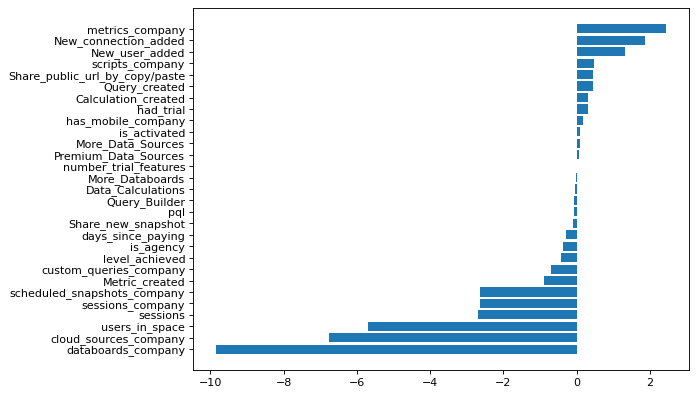

In [22]:



def f_importances(coef, names):
    figure(figsize=(8, 6), dpi=80)

    imp = coef
    imp,names = zip(*sorted(zip(imp,names)))
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.show()

features_names = list(X1.columns)
svm = svm.SVC(kernel='linear')
svm.fit(X1, np.ravel(Y1))
f_importances(svm.coef_[0], features_names)

### KNN

In [23]:
"""KNN"""

k_list = list(range(1,40))
f1_1 = []
f1_2 = []
acc_1 = []
acc_2 = []
for k in k_list:
    print("working with k: ", k)
    clf = KNeighborsClassifier(n_neighbors=k)
    scores1 = cross_val_score(clf, X1, np.ravel(Y1), cv=10)
    scores2 = cross_val_score(clf, X2, np.ravel(Y2), cv=10)
    scores3 = cross_val_score(clf, X1, np.ravel(Y1), scoring = "f1", cv=10)
    scores4 = cross_val_score(clf, X2, np.ravel(Y2), scoring = "f1", cv=10)
    
    f1_1.append(np.mean(scores3))
    f1_2.append(np.mean(scores4))
    acc_1.append(np.mean(scores1))
    acc_2.append(np.mean(scores2))
    
    
    print("#############################################################################")
    print("accuracy score with events and with k= {}: {}".format(k,  np.mean(scores1)) )
    print("accuracy score without events and with k= {}: {}".format(k, np.mean(scores2)))
    print("F1 score with events and with k= {}: {}".format(k,  np.mean(scores3)) )
    print("F1 score without events and with k= {}: {}".format(k, np.mean(scores4)))
print("end")


working with k:  1
#############################################################################
accuracy score with events and with k= 1: 0.5570794148380356
accuracy score without events and with k= 1: 0.5878134796238245
F1 score with events and with k= 1: 0.5668447993785994
F1 score without events and with k= 1: 0.5988974650572665
working with k:  2
#############################################################################
accuracy score with events and with k= 2: 0.5661815196297955
accuracy score without events and with k= 2: 0.5968931930138826
F1 score with events and with k= 2: 0.45946929996974967
F1 score without events and with k= 2: 0.5116639037357552
working with k:  3
#############################################################################
accuracy score with events and with k= 3: 0.5869383490073146
accuracy score without events and with k= 3: 0.6051108374384236
F1 score with events and with k= 3: 0.6047505543498459
F1 score without events and with k= 3: 0.62404557623

#############################################################################
accuracy score with events and with k= 26: 0.5968726675623227
accuracy score without events and with k= 26: 0.6146047917599642
F1 score with events and with k= 26: 0.6098403719576744
F1 score without events and with k= 26: 0.6206761303097317
working with k:  27
#############################################################################
accuracy score with events and with k= 27: 0.5990390356769668
accuracy score without events and with k= 27: 0.6158978952082401
F1 score with events and with k= 27: 0.6329252189410914
F1 score without events and with k= 27: 0.6376863213951185
working with k:  28
#############################################################################
accuracy score with events and with k= 28: 0.5955721003134795
accuracy score without events and with k= 28: 0.6159053590088073
F1 score with events and with k= 28: 0.608457788988502
F1 score without events and with k= 28: 0.622448112987256
wo

In [24]:
print("max acc score is: ", max(acc_1))
index = acc_1.index(max(acc_1))
print("at k= ", k_list[index])

clf = KNeighborsClassifier(n_neighbors=k_list[index])
score = cross_val_score(clf, X1, np.ravel(Y1), cv=10)
RESULT_DICT["KNN"] = score
print(score)

max acc score is:  0.6059654426033736
at k=  22
[0.59051724 0.62931034 0.53246753 0.58874459 0.60606061 0.5974026
 0.62337662 0.61471861 0.65800866 0.61904762]


### Gaussian Process

In [25]:
"""GAUSSIAN PROCESS - takes very long"""
#kernel = 1.0 * RBF(1.0)
#gpc = GaussianProcessClassifier(kernel=kernel, random_state=0)
#print(1)
#scores1 = cross_val_score(gpc, X1, np.ravel(Y1), cv=10)
#print(2)
#scores2 = cross_val_score(gpc, X2, np.ravel(Y2), cv=10)
#scores3 = cross_val_score(gpc, X1, np.ravel(Y1), scoring = "f1", cv=10)
#scores4 = cross_val_score(gpc, X2, np.ravel(Y2), scoring = "f1", cv=10)
    
#f1_1.append(np.mean(scores3))
#f1_2.append(np.mean(scores4))
#acc_1.append(np.mean(scores1))
#acc_2.append(np.mean(scores2))
    
    
#print("#############################################################################")
#print("accuracy score with events: {}".format(np.mean(scores1) ))
#print("accuracy score without events: {}".format(np.mean(scores2) ))
#print("F1 score with events: {}".format(np.mean(scores3)) )
#print("F1 score without events: {}".format(np.mean(scores4)))
#print("end")


'GAUSSIAN PROCESS - takes very long'

### Random Forest

In [26]:
"""RANDOM FOREST"""
k_list = list(range(1,30))
f1_1 = []
f1_2 = []
acc_1 = []
acc_2 = []
for k in k_list:
    print("working with {} trees".format(k))
    clf=RandomForestClassifier(n_estimators=k)
    scores1 = cross_val_score(clf, X1, np.ravel(Y1), cv=10)
    scores2 = cross_val_score(clf, X2, np.ravel(Y2), cv=10)
    scores3 = cross_val_score(clf, X1, np.ravel(Y1), scoring = "f1", cv=10)
    scores4 = cross_val_score(clf, X2, np.ravel(Y2), scoring = "f1", cv=10)

    f1_1.append(np.mean(scores3))
    f1_2.append(np.mean(scores4))
    acc_1.append(np.mean(scores1))
    acc_2.append(np.mean(scores2))
    
    
    print("#############################################################################")
    print("accuracy score with events and with k= {}: {}".format(k,  np.mean(scores1)) )
    print("accuracy score without events and with k= {}: {}".format(k, np.mean(scores2)))
    print("F1 score with events and with k= {}: {}".format(k,  np.mean(scores3)) )
    print("F1 score without events and with k= {}: {}".format(k, np.mean(scores4)))
print("end")
   


working with 1 trees
#############################################################################
accuracy score with events and with k= 1: 0.6513770712046573
accuracy score without events and with k= 1: 0.6535359755187341
F1 score with events and with k= 1: 0.6530015152107129
F1 score without events and with k= 1: 0.6592656417510044
working with 2 trees
#############################################################################
accuracy score with events and with k= 2: 0.6747369010300044
accuracy score without events and with k= 2: 0.6600276160620988
F1 score with events and with k= 2: 0.5851608486471327
F1 score without events and with k= 2: 0.5683533868950954
working with 3 trees
#############################################################################
accuracy score with events and with k= 3: 0.6924746230780714
accuracy score without events and with k= 3: 0.6889983579638751
F1 score with events and with k= 3: 0.6977636309778024
F1 score without events and with k= 3: 0.681101

#############################################################################
accuracy score with events and with k= 26: 0.7413382594417077
accuracy score without events and with k= 26: 0.7352776533811016
F1 score with events and with k= 26: 0.7383736081934748
F1 score without events and with k= 26: 0.7175392871912947
working with 27 trees
#############################################################################
accuracy score with events and with k= 27: 0.7456616659202866
accuracy score without events and with k= 27: 0.7361527839976115
F1 score with events and with k= 27: 0.7448104791919262
F1 score without events and with k= 27: 0.7199036309164936
working with 28 trees
#############################################################################
accuracy score with events and with k= 28: 0.751291237498134
accuracy score without events and with k= 28: 0.7370297805642634
F1 score with events and with k= 28: 0.7375134155386086
F1 score without events and with k= 28: 0.72097129502575

In [27]:
print("max acc score is: ", max(acc_1))
index = acc_1.index(max(acc_1))
print("at k= ", k_list[index])
print("with f1 score: ", f1_1[index])

clf=RandomForestClassifier(n_estimators=k_list[index])
score = cross_val_score(clf, X1, np.ravel(Y1), cv=10)
RESULT_DICT["RandomForest"] = score
print(score)

max acc score is:  0.7538830422451113
at k=  24
with f1 score:  0.7358541171404855
[0.73275862 0.78017241 0.67965368 0.75324675 0.75757576 0.76623377
 0.74458874 0.79220779 0.68398268 0.71861472]


In [28]:
clf=RandomForestClassifier(n_estimators=k_list[index]) #max
clf.fit(X1, np.ravel(Y1))
value= clf.feature_importances_
feature = list(X1.columns)

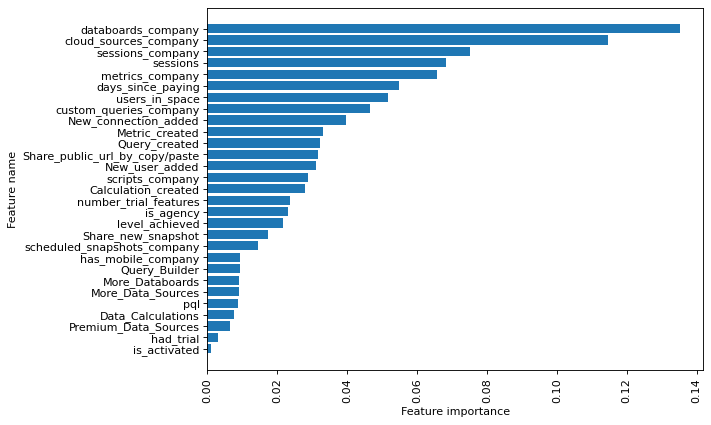

In [29]:
z = list(zip(value,feature))

z.sort()

value = [v for (v,f) in z]
feature = [f for (v,f) in z]
figure(figsize=(8, 6), dpi=80)

plt.barh(feature,value)
plt.xticks(rotation=90)
plt.xlabel("Feature importance")
plt.ylabel("Feature name")
plt.show()


### Naive Bayes

In [30]:
"""NAIVE BAYES"""

gnb = GaussianNB()
scores1 = cross_val_score(gnb, X1, np.ravel(Y1), cv=10)
scores2 = cross_val_score(gnb, X2, np.ravel(Y2), cv=10)
scores3 = cross_val_score(gnb, X1, np.ravel(Y1), scoring = "f1", cv=10)
scores4 = cross_val_score(gnb, X2, np.ravel(Y2), scoring = "f1", cv=10)
    
print("accuracy score with events: {}".format(np.mean(scores1) ))
print("accuracy score without events: {}".format(np.mean(scores2) ))
print("F1 score with events: {}".format(np.mean(scores3)) )
print("F1 score without events: {}".format(np.mean(scores4)))


RESULT_DICT["NaiveBayes"] = scores1
print(scores1)

accuracy score with events: 0.6098858038513211
accuracy score without events: 0.5406665173906553
F1 score with events: 0.6938271226296402
F1 score without events: 0.20761227562774515
[0.58189655 0.58189655 0.63636364 0.61038961 0.57575758 0.64069264
 0.61904762 0.63203463 0.6017316  0.61904762]


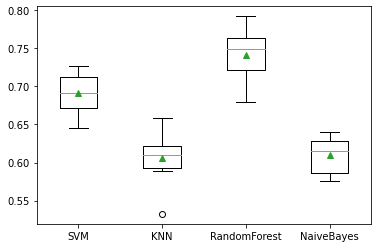

In [31]:
RESULT_DICT
fig, ax = plt.subplots()
ax.boxplot(RESULT_DICT.values(), showmeans=True)
ax.set_xticklabels(RESULT_DICT.keys())
plt.show()

## Problem 2: Became paying

In [32]:
data.head()

,distinct_id,country,is_agency,company_created,became_paying,became_pql,cancelled,had_trial,is_activated,level_achieved,...,sessions,number_trial_features,Query_Builder,Data_Calculations,More_Data_Sources,More_Databoards,Premium_Data_Sources,paying,pql,had_cancelled
0,142868,South Africa,1,2019-11-29T11:30:00,undefined,undefined,undefined,0,1,0,...,0.0,0,0,0,0,0,0,0,0,0
1,143012,Canada,0,2019-11-30T22:14:00,undefined,undefined,undefined,0,1,0,...,0.0,0,0,0,0,0,0,0,0,0
2,143074,Spain,0,2019-12-01T17:24:00,2020-02-09T22:49:00,2019-12-02T18:05:00,undefined,1,1,3,...,904.0,2,0,0,1,1,0,1,1,0
3,143438,France,0,2019-12-03T14:02:00,undefined,undefined,undefined,0,0,0,...,0.0,0,0,0,0,0,0,0,0,0
4,144226,Italy,0,2019-12-07T19:03:00,undefined,undefined,undefined,0,1,0,...,0.0,0,0,0,0,0,0,0,0,0


In [33]:
data.columns

Index(['distinct_id', 'country', 'is_agency', 'company_created',
       'became_paying', 'became_pql', 'cancelled', 'had_trial', 'is_activated',
       'level_achieved', 'has_mobile_company', 'sessions_company',
       'databoards_company', 'cloud_sources_company', 'metrics_company',
       'users_in_space', 'scheduled_snapshots_company',
       'custom_queries_company', 'scripts_company', 'Calculation_created',
       'Metric_created', 'New_connection_added', 'New_user_added',
       'Query_created', 'Share_new_snapshot', 'Share_public_url_by_copy/paste',
       'sessions', 'number_trial_features', 'Query_Builder',
       'Data_Calculations', 'More_Data_Sources', 'More_Databoards',
       'Premium_Data_Sources', 'paying', 'pql', 'had_cancelled'],
      dtype='object')

In [34]:
data.dtypes

distinct_id                         int64
country                            object
is_agency                           int32
company_created                    object
became_paying                      object
became_pql                         object
cancelled                          object
had_trial                           int32
is_activated                        int32
level_achieved                      int32
has_mobile_company                  int32
sessions_company                    int64
databoards_company                  int64
cloud_sources_company               int64
metrics_company                     int64
users_in_space                      int64
scheduled_snapshots_company         int64
custom_queries_company              int64
scripts_company                     int64
Calculation_created               float64
Metric_created                    float64
New_connection_added              float64
New_user_added                    float64
Query_created                     